In [1]:
#------------------------------------------------#
# Dependencies
#------------------------------------------------#
import os
import csv
import pandas as pd
import numpy as np
import json 
import requests
import random
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from matplotlib.font_manager import FontProperties
from scipy.misc import imread
import matplotlib.image as mpimg

In [2]:
#------------------------------------------------#
# CSV Time
#------------------------------------------------#

# Store the CSV filepath in a variable
the311 = "Resources/Merged3112018Data.csv"

# Now, read the data from the 311 CSV into a DataFrame
the311_df = pd.read_csv(the311, sep=',', error_bad_lines=False, index_col=False, dtype='unicode')

# Preview the DataFrame, but only 20 rows
the311_df.head(20)

,Unique Key,Month,Created Date,Agency Name,Complaint Type,Descriptor,Location Type,Landmark,Borough,Incident Zip,Latitude,Longitude,Location
0,39404080,June,6/8/2018 13:59,New York City Police Department,Non-Emergency Police Matter,Other (complaint details),Street/Sidewalk,WOODLAWN CEMETERY,BRONX,10467,40.8888923,-73.8725547,"(40.88889230263962, -73.87255469830917)"
1,39406030,June,6/8/2018 14:08,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,WOODLAWN CEMETERY,BRONX,10467,40.8888923,-73.8725547,"(40.88889230263962, -73.87255469830917)"
2,39716202,July,7/12/2018 22:20,Department of Parks and Recreation,Maintenance or Facility,Hours of Operation,Street/Curbside,DEVOE PARK,BRONX,10468,40.8631302,-73.90654452,"(40.863130202365284, -73.90654451754935)"
3,41102839,December,12/4/2018 8:57,Department of Parks and Recreation,Maintenance or Facility,Structure - Indoors,Park,BRONX PARK,BRONX,10467,40.85666488,-73.87579761,"(40.85666487533718, -73.87579760930149)"
4,39726709,July,7/13/2018 7:24,New York City Police Department,Noise - Park,Loud Music/Party,Park/Playground,HAFFEN PARK,BRONX,10469,40.87368343,-73.83916591,"(40.87368343276026, -73.83916591245767)"
5,39739517,July,7/15/2018 15:24,Department of Parks and Recreation,Violation of Park Rules,BBQ Outside Authorized Area,Park,BARRETTO PARK,BRONX,10474,40.81285044,-73.8886751,"(40.81285043551196, -73.88867510043575)"
6,39415071,June,6/9/2018 23:49,New York City Police Department,Noise - Park,Loud Music/Party,Park/Playground,BRIDGE PARK,BRONX,10453,40.84594143,-73.92742356,"(40.84594142686875, -73.92742355752964)"
7,39424257,June,6/10/2018 22:04,New York City Police Department,Noise - Park,Loud Music/Party,Park/Playground,SOUNDVIEW PARK,BRONX,10473,40.81773577,-73.87501764,"(40.817735769859965, -73.87501763502273)"
8,39426862,June,6/11/2018 1:14,New York City Police Department,Noise - Park,Loud Music/Party,Park/Playground,DEVOE PARK,BRONX,10468,40.8631302,-73.90654452,"(40.863130202365284, -73.90654451754935)"
9,39437040,June,6/11/2018 19:39,Department of Parks and Recreation,Violation of Park Rules,Unsafe Use of Playground,Park,PELHAM BAY PARK,BRONX,10465,40.85690624,-73.8248876,"(40.8569062428053, -73.82488760016611)"


In [3]:
# Count the total number of complaints in the data set
complaint_count = len(the311_df['Unique Key'])
complaint_count

814

In [4]:
# Check out the Top 5 Complaint Types Overall 
top5_comps = the311_df['Complaint Type'].value_counts().head()
top5_comps_df = pd.DataFrame(top5_comps)
top5_comps_df

,Complaint Type
Noise - Park,178
DPR Internal,114
Violation of Park Rules,106
Animal in a Park,71
Maintenance or Facility,70


In [5]:
# Check out the Botoom 5 Complaint Types Overall 
top5_comps = the311_df['Complaint Type'].value_counts().tail()
top5_comps_df = pd.DataFrame(top5_comps)
top5_comps_df

,Complaint Type
Mold,1
New Tree Request,1
Public Payphone Complaint,1
Street Sign - Missing,1
For Hire Vehicle Report,1


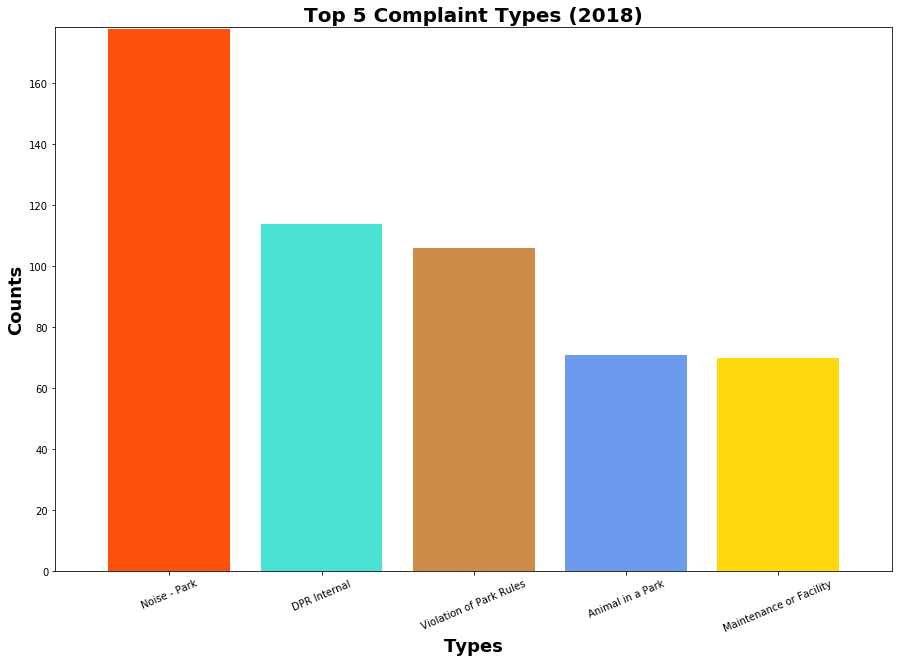

In [6]:
# Make a Bar Graph of the Top 5 Overall Complaint Types
top5types = ["Noise - Park", "DPR Internal", "Violation of Park Rules", "Animal in a Park", "Maintenance or Facility"]
typecounts = [178, 114, 106, 71, 70]
x_axis = np.arange(len(typecounts))

# Plot that graph and make it nice, mmmk?
plt.figure(figsize = (15,10))
plt.bar(top5types, typecounts, align="center", color=['orangered', 'turquoise', 'peru', 'cornflowerblue', 'gold'], alpha=0.95)
plt.title("Top 5 Complaint Types (2018)", fontdict = {'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel("Types", fontdict = {'fontsize': 18, 'fontweight': 'bold'})
plt.ylabel("Counts", fontdict = {'fontsize': 18, 'fontweight': 'bold'})
plt.xticks(x_axis, top5types, rotation=23)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(typecounts)+0.4)
plt.savefig("Top5CompTypesBar.png")
plt.show()

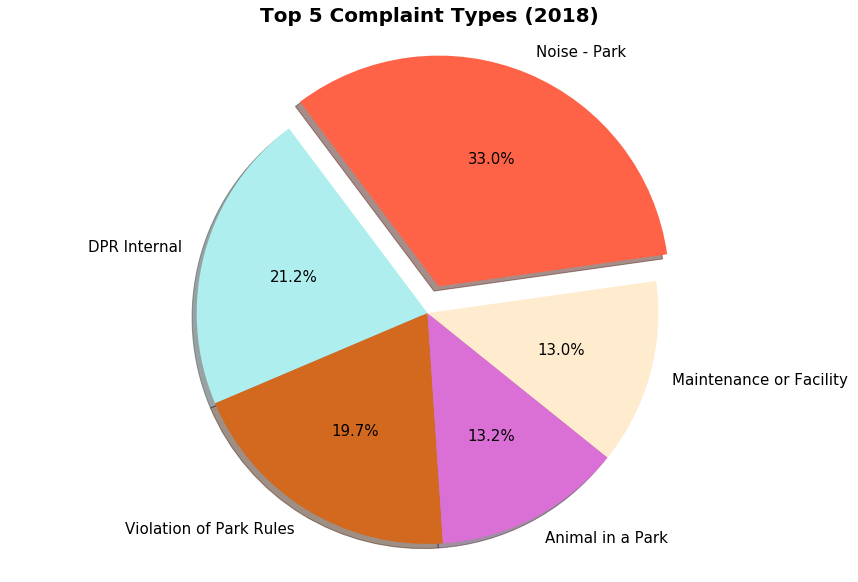

In [8]:
# Yay! Now turn it into a pie chart with %s!
top5types = ["Noise - Park", "DPR Internal", "Violation of Park Rules", "Animal in a Park", "Maintenance or Facility"]
typecounts = [178, 114, 106, 71, 70]
colors = ["tomato", "paleturquoise", "chocolate", "orchid", "blanchedalmond"]
explode = (0.125,0,0,0,0)

# # Plot that graph and make it nice, mmmk?
plt.figure(figsize = (15,10))
plt.title("Top 5 Complaint Types (2018)", fontdict = {'fontsize': 20, 'fontweight': 'bold'})
plt.pie(typecounts, textprops={'fontsize': 15}, explode=explode, labels=top5types, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=8,)
plt.axis("equal")
plt.savefig("Top5CompTypesPie.png")
plt.show()

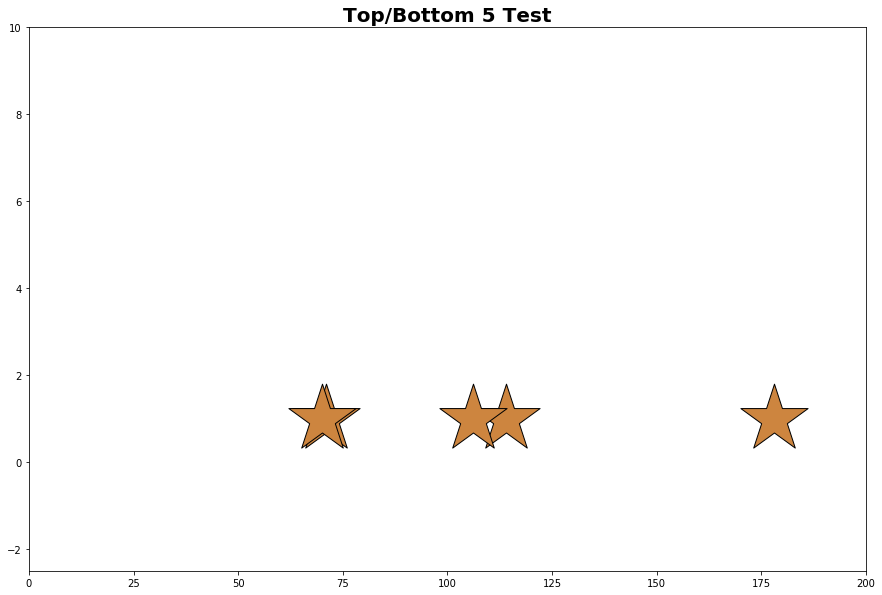

In [9]:
# K, now make a scatter plot of the Top 5's -vs- the Bottom 5's
top5cts = [178, 114, 106, 71, 70]
bot5cts = [1,1,1,1,1]
x_limit = 200
x_axis = np.arange(0, x_limit)

# # Plot that graph and make it nice, mmmk?
plt.figure(figsize = (15,10))
plt.title("Top/Bottom 5 Test", fontdict = {'fontsize': 20, 'fontweight': 'bold'})
plt.scatter([178, 114, 106, 71, 70],[1,1,1,1,1],s=5000, marker = '*', facecolors='peru', edgecolors="black")
plt.ylim(-2.5, 10)
plt.xlim(0, x_limit)
plt.show()

#not a great representation - don't use

In [10]:
# Let's take a closer look at what the Complaint Types mean

# Expand the Top 5 Complaint Type DataFrame
top5_comps = top5_comps.index.values
top5_comps_df = the311_df.loc[the311_df['Complaint Type'].isin(top5_comps)]
top5_comps_df.count()  
top5_comps_df  

,Unique Key,Month,Created Date,Agency Name,Complaint Type,Descriptor,Location Type,Landmark,Borough,Incident Zip,Latitude,Longitude,Location
259,39647395,July,7/5/2018 13:03,Department of Transportation,Street Sign - Missing,Other/Unknown,Street,GRAND ARMY PLAZA,BROOKLYN,11238,40.67399127,-73.97011778,"(40.67399126989863, -73.97011777647462)"
518,40414405,September,9/29/2018 20:07,Department of Information Technology and Telec...,Public Payphone Complaint,Damaged Telephone,Street and Sidewalk,MADISON SQUARE GARDEN,MANHATTAN,10001,40.750475,-73.99336993,"(40.75047500123587, -73.99336992791751)"
547,40497719,October,10/9/2018 13:10,Department of Health and Mental Hygiene,Mold,Public Complaint - Comm Location,Commercial Building,TIMES SQUARE,MANHATTAN,10036,40.75658179,-73.98963708,"(40.756581786411466, -73.98963708106945)"
584,38835963,April,4/1/2018 12:55,Department of Parks and Recreation,New Tree Request,For One Address,Street,CITY HALL,MANHATTAN,10007,40.71274564,-74.0060095,"(40.71274563665573, -74.00600949796177)"
740,39874533,July,7/30/2018 12:04,Taxi and Limousine Commission,For Hire Vehicle Report,Car Service Company Report,Street,J F K AIRPORT,QUEENS,11430,40.64832049,-73.78828125,"(40.64832048620134, -73.78828125130184)"


In [11]:
# Now, let's group and sort by Month 
comp_descs = the311_df.loc[:,['Month','Borough','Complaint Type', 'Descriptor', 'Landmark','Location Type']]
comp_descs
comp_descs_df = the311_df.groupby(['Month'])
comp_descs_df = comp_descs_df.count()
comp_descs_df = comp_descs_df.sort_values('Month', ascending=False)
comp_descs_df

,Unique Key,Created Date,Agency Name,Complaint Type,Descriptor,Location Type,Landmark,Borough,Incident Zip,Latitude,Longitude,Location
Month,,,,,,,,,,,,
September,89,89,89,89,89,89,89,89,89,89,89,89
October,64,64,64,64,64,64,64,64,64,64,64,64
November,53,53,53,53,53,53,53,53,53,53,53,53
May,86,86,86,86,86,86,86,86,86,86,86,86
March,36,36,36,36,36,36,36,36,36,36,36,36
June,118,118,118,118,118,118,118,118,118,118,118,118
July,133,133,133,133,133,133,133,133,133,133,133,133
January,19,19,19,19,19,19,19,19,19,19,19,19
February,20,20,20,20,20,20,20,20,20,20,20,20


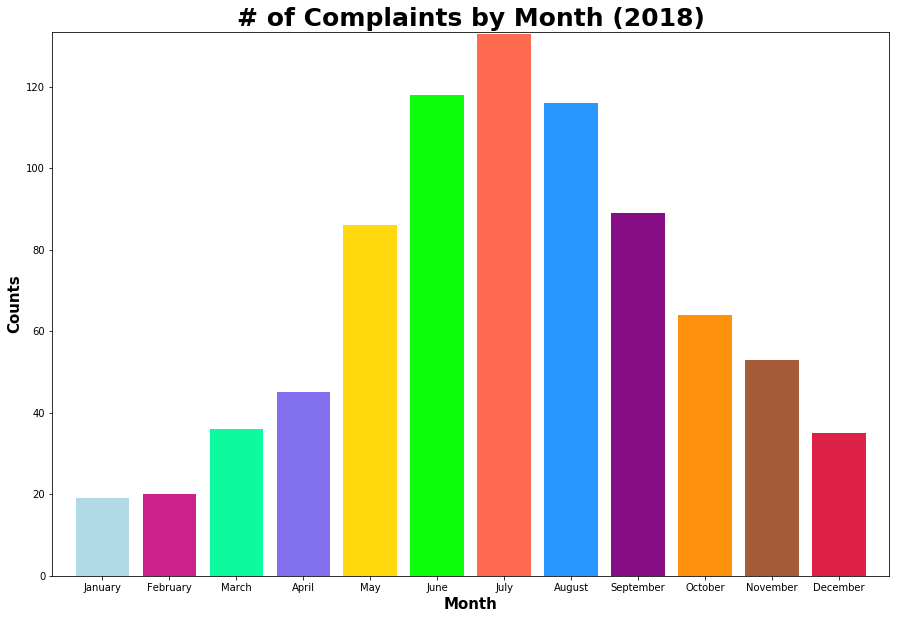

In [12]:
# Make a Bar Graph of the # of Complaints by Month
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
monthcounts = [19, 20, 36, 45, 86, 118, 133, 116, 89, 64, 53, 35]
colors = ['lightblue','mediumvioletred', 'mediumspringgreen', 'mediumslateblue','gold','lime',
          'tomato','dodgerblue','purple', 'darkorange', 'sienna', 'crimson']                                                                            
x_axis = np.arange(len(monthcounts))

# Plot that graph and make it nice, mmmk?
plt.figure(figsize = (15,10))
plt.bar(months, monthcounts, align="center", color=colors, alpha=0.95)
plt.title("# of Complaints by Month (2018)", fontdict = {'fontsize': 25, 'fontweight': 'bold'})
plt.xlabel("Month", fontdict = {'fontsize': 15, 'fontweight': 'bold'})
plt.ylabel("Counts", fontdict = {'fontsize': 15, 'fontweight': 'bold'})
plt.xticks(x_axis, months, rotation=0)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(monthcounts)+0.4)
plt.savefig("CompsbyMonthBar.png")
plt.show()

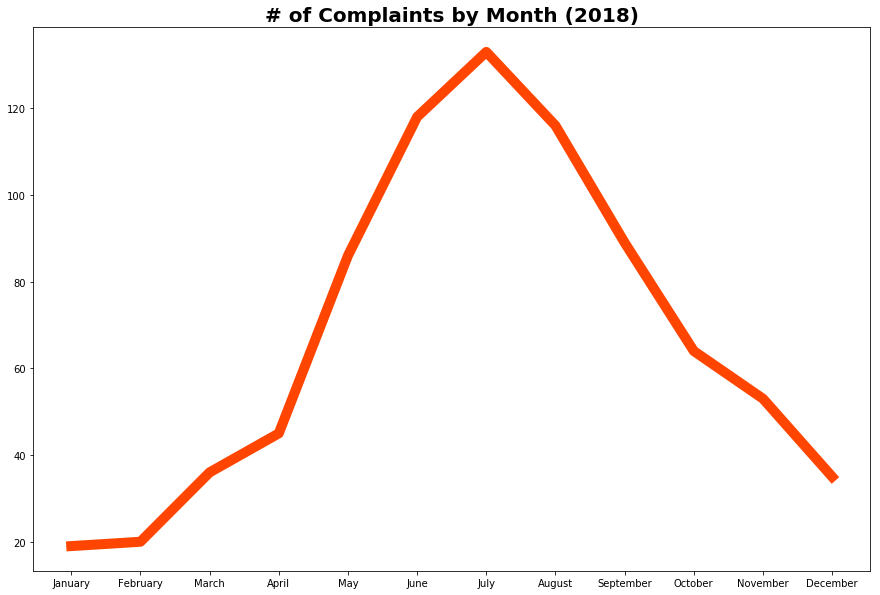

In [13]:
#Now, make a line graph 
plt.figure(figsize = (15,10))
plt.title("# of Complaints by Month (2018)", fontdict = {'fontsize': 20, 'fontweight': 'bold'})
plt.plot(months, monthcounts, color='orangered', linewidth= 10.0, label = '')
plt.savefig("CompsbyMonthLine.png")
plt.show()

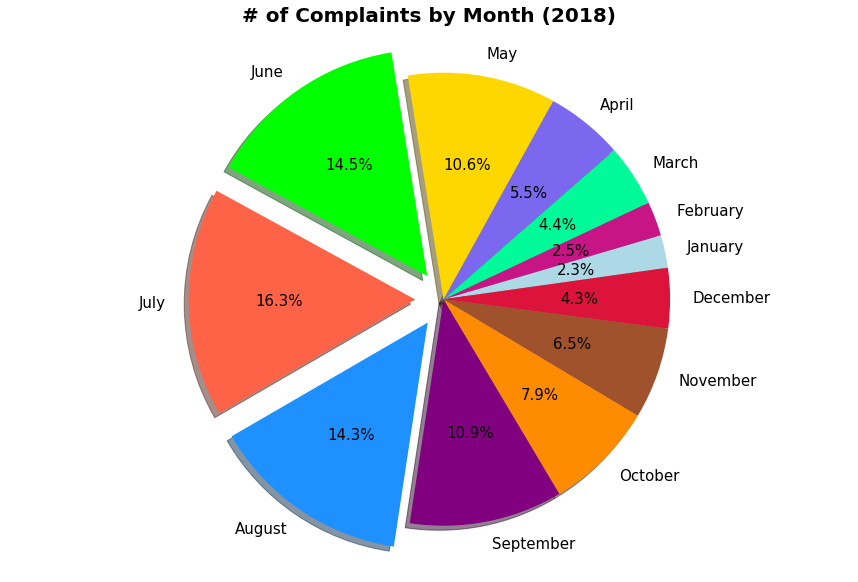

In [14]:
# Yay! Now turn it into a pie chart with %s!
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
monthcounts = [19, 20, 36, 45, 86, 118, 133, 116, 89, 64, 53, 35]
colors = ['lightblue','mediumvioletred', 'mediumspringgreen', 'mediumslateblue','gold','lime',
          'tomato','dodgerblue','purple', 'darkorange', 'sienna', 'crimson']   
explode = (0,0,0,0,0,0.125, 0.125, 0.125, 0,0,0,0)

# # Plot that graph and make it nice, mmmk?
plt.figure(figsize = (15,10))
plt.title("# of Complaints by Month (2018)", fontdict = {'fontsize': 20, 'fontweight': 'bold'})
plt.pie(monthcounts, textprops={'fontsize': 15}, explode=explode, labels=months, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=8,)
plt.axis("equal")
plt.savefig("CompsbyMonthPie.png")
plt.show()

In [15]:
# Checkout the data by Borough
borough_comps = the311_df['Borough'].value_counts().head()
borough_comps_df = pd.DataFrame(borough_comps)
borough_comps_df

,Borough
MANHATTAN,298
QUEENS,184
BROOKLYN,173
BRONX,124
STATEN ISLAND,35


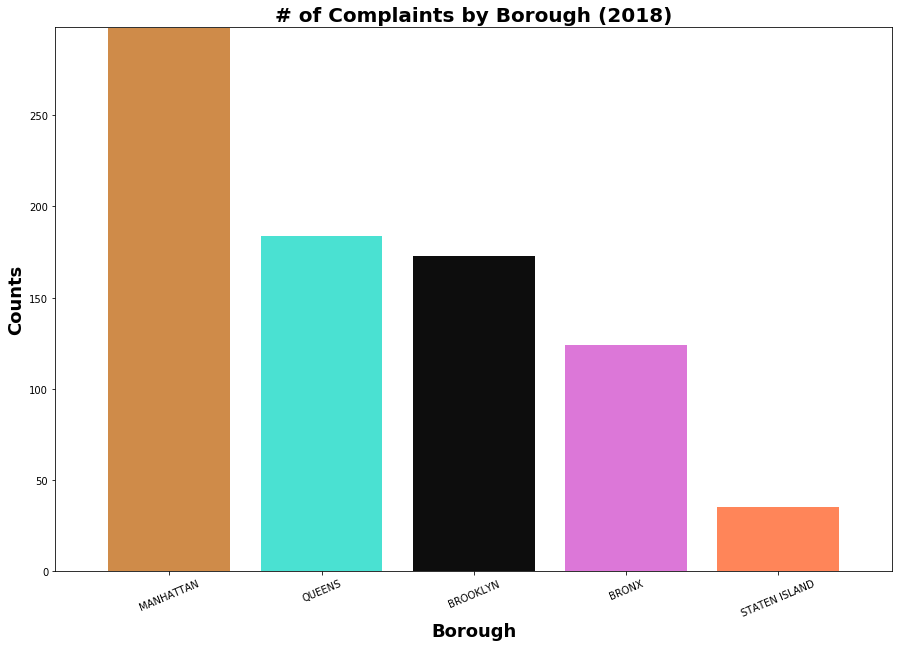

In [16]:
# Make a Bar Graph of the Top 5 Overall Complaint Types
boroughs = ["MANHATTAN", "QUEENS", "BROOKLYN", "BRONX", "STATEN ISLAND"]
borcounts = [298, 184, 173, 124, 35]
x_axis = np.arange(len(borcounts))

# Plot that graph and make it nice, mmmk?
plt.figure(figsize = (15,10))
plt.bar(boroughs, borcounts, align="center", color=['peru', 'turquoise', 'black', 'orchid', 'coral'], alpha=0.95)
plt.title("# of Complaints by Borough (2018)", fontdict = {'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel("Borough", fontdict = {'fontsize': 18, 'fontweight': 'bold'})
plt.ylabel("Counts", fontdict = {'fontsize': 18, 'fontweight': 'bold'})
plt.xticks(x_axis, boroughs, rotation=23)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(borcounts)+0.4)
plt.savefig("CompsbyBorBar.png")
plt.show()

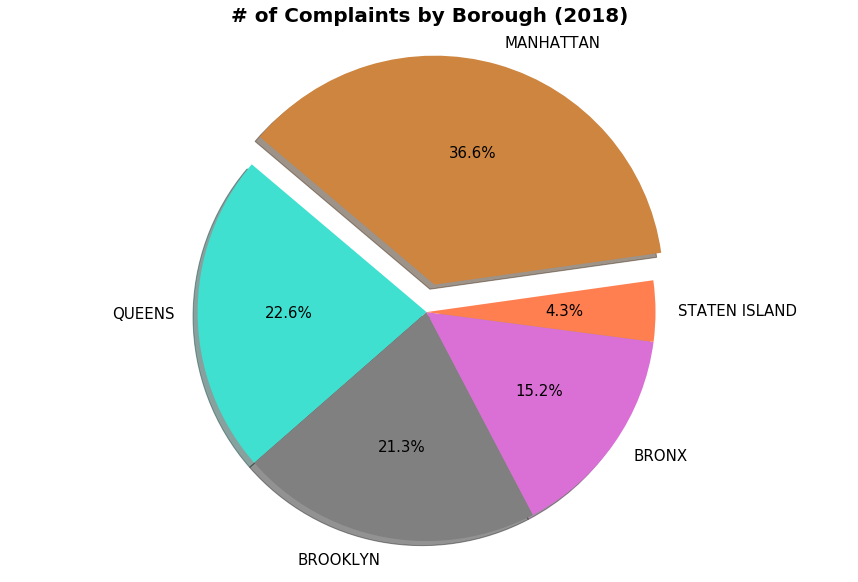

In [17]:
# Yay! Now turn it into a pie chart with %s!
boroughs = ["MANHATTAN", "QUEENS", "BROOKLYN", "BRONX", "STATEN ISLAND"]
borcounts = [298, 184, 173, 124, 35]
colors = ['peru', 'turquoise', 'gray', 'orchid', 'coral']
explode = (0.125,0,0,0,0)

# # Plot that graph and make it nice, mmmk?
plt.figure(figsize = (15,10))
plt.title("# of Complaints by Borough (2018)", fontdict = {'fontsize': 20, 'fontweight': 'bold'})
plt.pie(borcounts, textprops={'fontsize': 15}, explode=explode, labels=boroughs, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=8,)
plt.axis("equal")
plt.savefig("CompsbyBorPie.png")
plt.show()

In [17]:
# borcounts = 298+184+173+124+35
# borcounts

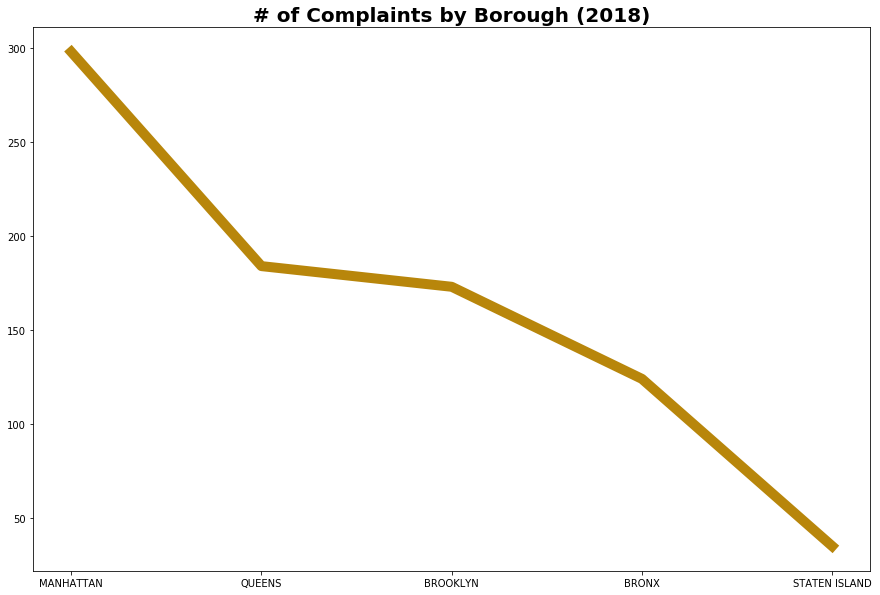

In [18]:
#Now, make a line graph 
plt.figure(figsize = (15,10))
plt.title("# of Complaints by Borough (2018)", fontdict = {'fontsize': 20, 'fontweight': 'bold'})
plt.plot(boroughs, borcounts, color='darkgoldenrod', linewidth= 10.0, label = '')
plt.savefig("CompsbyBorLine.png")
plt.show()

In [19]:
#So, what kind of complaints are they? 

# Next, Top 5 Complaint Descriptors 
top5_compdescs = the311_df['Descriptor'].value_counts().head()
top5_compdescs_df = pd.DataFrame(top5_compdescs)
top5_compdescs_df

,Descriptor
Loud Music/Party,200
Aided/Injury,91
Obstructing Public Use,43
Unlicensed Vendors,41
Driver Complaint,32


In [20]:
# And the bottom 5 
top5_compdescs = the311_df['Descriptor'].value_counts().tail()
top5_compdescs_df = pd.DataFrame(top5_compdescs)
top5_compdescs_df

,Descriptor
Snow or Ice,1
No Access,1
Tree Leaning/Uprooted,1
Fountain - Over 5 Gallons,1
Damaged Other,1


In [21]:
# K, now expand that DataFrame, hunnay
top5_compdescs = top5_compdescs.index.values
top5_compdescs_df = the311_df.loc[the311_df['Descriptor'].isin(top5_compdescs)]
top5_compdescs_df.count()  
top5_compdescs_df


,Unique Key,Month,Created Date,Agency Name,Complaint Type,Descriptor,Location Type,Landmark,Borough,Incident Zip,Latitude,Longitude,Location
134,39733589,July,7/13/2018 20:27,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,P S 288,BROOKLYN,11224,40.57424098,-73.99227873,"(40.57424097699584, -73.99227872538901)"
208,39604030,June,6/30/2018 0:00,Department of Health and Mental Hygiene,Standing Water,Fountain - Over 5 Gallons,Other,PROSPECT PARK,BROOKLYN,11215,40.6613542,-73.9696801,"(40.66135420007725, -73.96968010080575)"
556,38139574,January,1/7/2018 11:17,Department of Parks and Recreation,Maintenance or Facility,Snow or Ice,Street/Curbside,ISHAM PARK,MANHATTAN,10034,40.87023791,-73.91972817,"(40.87023791438702, -73.91972816874608)"
680,40645724,October,10/24/2018 14:22,Department of Transportation,Bus Stop Shelter Complaint,Damaged Other,Bus Stop Shelter,J F K AIRPORT,QUEENS,11430,40.64832049,-73.78828125,"(40.64832048620134, -73.78828125130184)"
773,38772177,March,3/24/2018 21:01,Department of Parks and Recreation,Damaged Tree,Tree Leaning/Uprooted,Street,ST JOHNS UNIVERSITY,QUEENS,11432,40.72208714,-73.79473551,"(40.72208713776957, -73.79473550751592)"


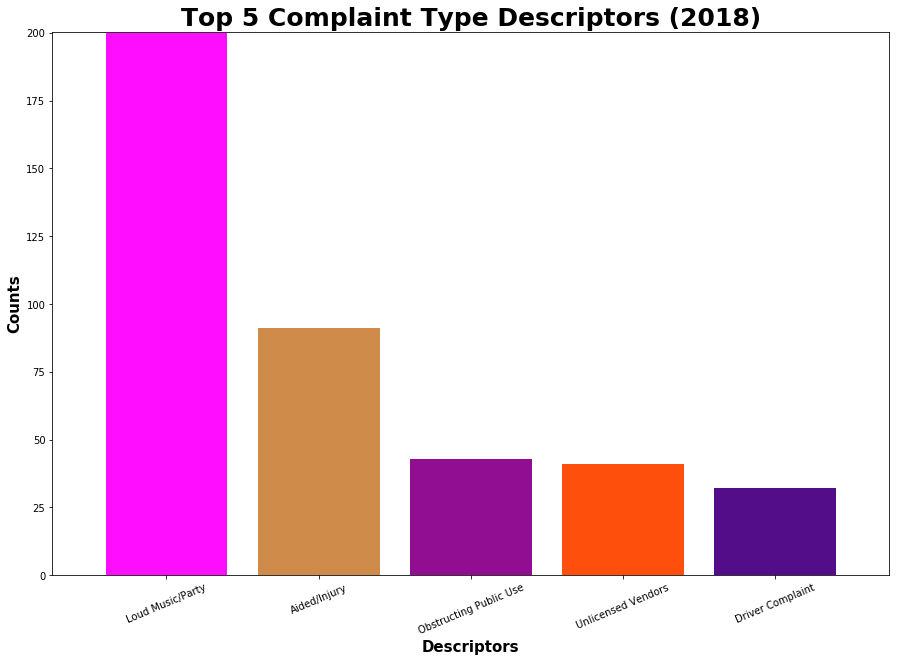

In [22]:
# Make a Bar Graph of the Top 5 Complaint Descriptors
desctypes = ["Loud Music/Party", "Aided/Injury", "Obstructing Public Use", "Unlicensed Vendors", "Driver Complaint"]
typecounts = [200, 91, 43, 41, 32]
x_axis = np.arange(len(typecounts))


# # Plot that graph and make it nice, mmmk?
plt.figure(figsize = (15,10))
plt.bar(desctypes, typecounts, align="center", color=['Fuchsia', 
                                                     'peru', 
                                                     'darkmagenta', 
                                                     'orangered',
                                                     'indigo'], alpha=0.95)
plt.title("Top 5 Complaint Type Descriptors (2018)", fontdict = {'fontsize': 25, 'fontweight': 'bold'})
plt.xlabel("Descriptors", fontdict = {'fontsize': 15, 'fontweight': 'bold'})
plt.ylabel("Counts", fontdict = {'fontsize': 15, 'fontweight': 'bold'})
plt.xticks(x_axis, desctypes, rotation=23)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(typecounts)+0.4)
plt.savefig("CompDescBar.png")
plt.show()

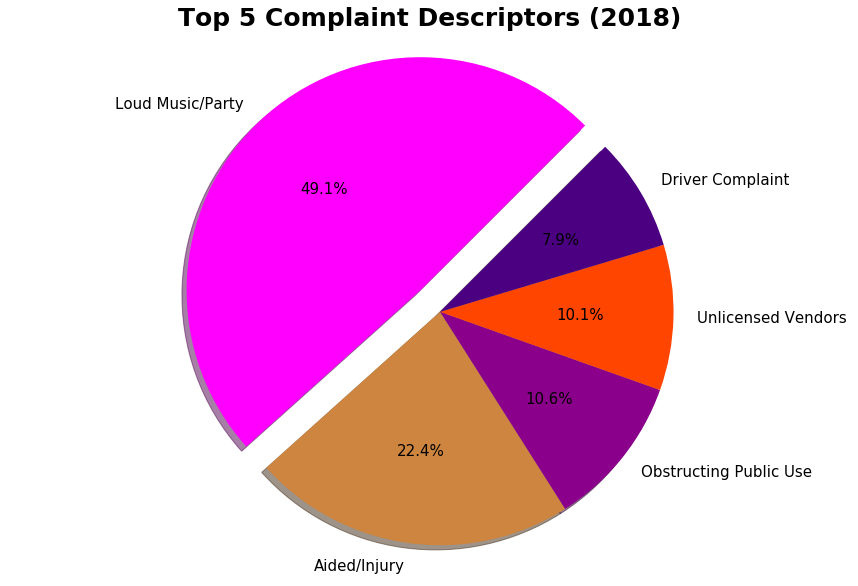

In [23]:
# Yay! Now turn it into a pie chart with %s!
desctypes = ["Loud Music/Party", "Aided/Injury", "Obstructing Public Use", "Unlicensed Vendors", "Driver Complaint"]
typecounts = [200, 91, 43, 41, 32]
colors = ["fuchsia", "peru", "darkmagenta", "orangered", "indigo"]
explode = (0.125,0,0,0,0)

# Plot that graph and make it nice, mmmk?
plt.figure(figsize = (15,10))
plt.title("Top 5 Complaint Descriptors (2018)", fontdict = {'fontsize': 25, 'fontweight': 'bold'})
plt.pie(typecounts, textprops={'fontsize': 15}, explode=explode, labels=desctypes, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=45,)
plt.axis("equal")
plt.savefig("CompDescPie.png")
plt.show()

In [24]:
# Ok, cool. Next, let's look at the location types

# Next, Top 5 Complaint Descriptors 
complocs = the311_df['Location Type'].value_counts().head()
complocs_df = pd.DataFrame(complocs)
complocs_df


,Location Type
Park,281
Park/Playground,193
Street/Sidewalk,116
Street,94
Street/Curbside,37


In [25]:
# K, now the bottom 5
complocs = the311_df['Location Type'].value_counts().tail()
complocs_df = pd.DataFrame(complocs)
complocs_df

,Location Type
Crosswalk,1
Street and Sidewalk,1
Overpass,1
Vacant Lot/Property,1
Government Building,1


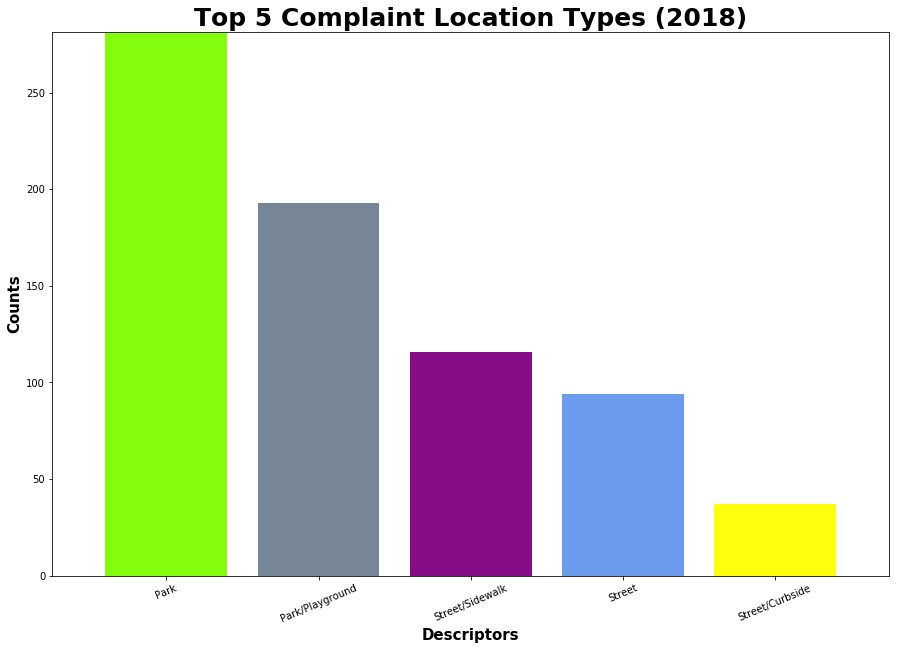

In [26]:
# Make a Bar Graph of the Top 5 Complaint Location Types
loctypes = ["Park", "Park/Playground", "Street/Sidewalk", "Street", "Street/Curbside"]
loccounts = [281, 193, 116, 94, 37]
x_axis = np.arange(len(loccounts))


# # Plot that graph and make it nice, mmmk?
plt.figure(figsize = (15,10))
plt.bar(loctypes, loccounts, align="center", color=['lawngreen', 
                                                     'slategray', 
                                                     'purple', 
                                                     'cornflowerblue',
                                                     'yellow'], alpha=0.95)
plt.title("Top 5 Complaint Location Types (2018)", fontdict = {'fontsize': 25, 'fontweight': 'bold'})
plt.xlabel("Descriptors", fontdict = {'fontsize': 15, 'fontweight': 'bold'})
plt.ylabel("Counts", fontdict = {'fontsize': 15, 'fontweight': 'bold'})
plt.xticks(x_axis, loctypes, rotation=23)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(loccounts)+0.4)
plt.savefig("CompLocBar.png")
plt.show()

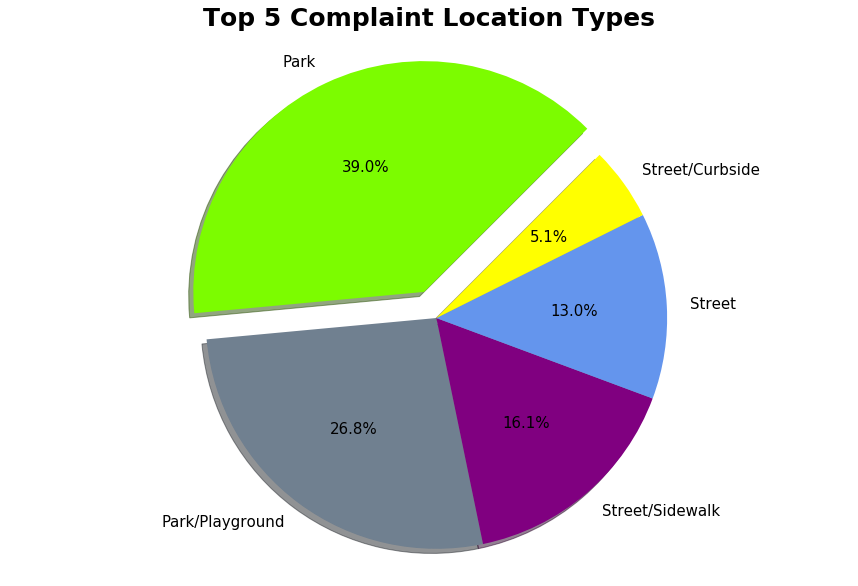

In [28]:
# Yay! Now turn it into a pie chart with %s!
loctypes = ["Park", "Park/Playground", "Street/Sidewalk", "Street", "Street/Curbside"]
loccounts = [281, 193, 116, 94, 37]
colors = ["lawngreen", "slategray", "purple", "cornflowerblue", "yellow"]
explode = (0.125,0,0,0,0)

# Plot that graph and make it nice, mmmk?
plt.figure(figsize = (15,10))
plt.title("Top 5 Complaint Location Types", fontdict = {'fontsize': 25, 'fontweight': 'bold'})
plt.pie(loccounts, textprops={'fontsize': 15}, explode=explode, labels=loctypes, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=45,)
plt.axis("equal")
plt.savefig("CompLocPie.png")
plt.show()